In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv('HR.csv')

In [3]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,2092,Operations,region_7,Bachelor's,m,other,1,42,4.0,11,0,0,58,0
1,12576,Sales & Marketing,region_22,Bachelor's,f,sourcing,1,37,5.0,8,0,0,50,0
2,74716,Technology,region_31,Bachelor's,m,other,1,36,5.0,2,1,0,82,1
3,6383,Sales & Marketing,region_30,Bachelor's,m,sourcing,2,27,3.0,4,0,0,50,0
4,34886,Technology,region_2,Below Secondary,f,referred,1,22,3.0,2,0,0,80,0


In [4]:
df.shape

(38918, 14)

#### To cheack if there is any missing value

In [5]:
df.isnull().values.any()

False

In [6]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,38918.0,39183.115859,22661.286081,1.0,19523.25,39241.0,58789.75,78298.0
no_of_trainings,38918.0,1.250655,0.602559,1.0,1.00,1.0,1.00,10.0
age,38918.0,35.584100,7.536824,20.0,30.00,34.0,39.00,60.0
previous_year_rating,38918.0,3.340742,1.255872,1.0,3.00,3.0,4.00,5.0
length_of_service,38918.0,6.308572,4.202567,1.0,3.00,5.0,8.00,37.0
KPIs_met >80%,38918.0,0.358138,0.479459,0.0,0.00,0.0,1.00,1.0
awards_won?,38918.0,0.023639,0.151925,0.0,0.00,0.0,0.00,1.0
avg_training_score,38918.0,63.614677,13.259943,39.0,52.00,60.0,76.00,99.0
is_promoted,38918.0,0.086978,0.281806,0.0,0.00,0.0,0.00,1.0


In [8]:
df['is_promoted'].value_counts()

0    35533
1     3385
Name: is_promoted, dtype: int64

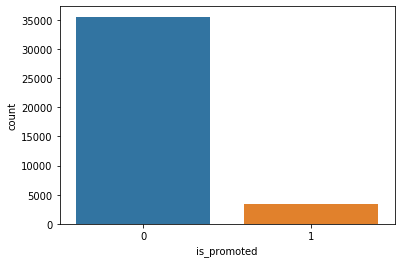

In [9]:
sns.countplot(df['is_promoted'])

#### we can now clearly see that the data have an inbalanced target variable i.e is_promoted, we will correct it we we are doing our data preprocessing 

### To get to know out object data variables a littel bit more

In [10]:
for column in df.columns:
    if df[column].dtype== object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print('_________________________________________________________________________')

department : ['Operations' 'Sales & Marketing' 'Technology' 'Analytics' 'Procurement'
 'HR' 'Legal' 'R&D' 'Finance']
Sales & Marketing    11349
Operations            8446
Procurement           5319
Technology            5237
Analytics             3640
Finance               1804
HR                    1713
R&D                    724
Legal                  686
Name: department, dtype: int64
_________________________________________________________________________
region : ['region_7' 'region_22' 'region_31' 'region_30' 'region_2' 'region_14'
 'region_23' 'region_10' 'region_26' 'region_13' 'region_4' 'region_29'
 'region_16' 'region_15' 'region_6' 'region_20' 'region_11' 'region_27'
 'region_21' 'region_19' 'region_24' 'region_8' 'region_28' 'region_32'
 'region_3' 'region_17' 'region_25' 'region_34' 'region_5' 'region_1'
 'region_12' 'region_33' 'region_9' 'region_18']
region_2     8617
region_22    4353
region_7     3527
region_15    2022
region_13    1969
region_26    1561
region_31   

### Features Importance

#### Need to convert the object into numbers 

In [11]:
data = pd.read_csv('HR.csv', usecols=['department', 'region', 'education', 'gender', 'recruitment_channel'])

In [12]:
data.head()

,department,region,education,gender,recruitment_channel
0,Operations,region_7,Bachelor's,m,other
1,Sales & Marketing,region_22,Bachelor's,f,sourcing
2,Technology,region_31,Bachelor's,m,other
3,Sales & Marketing,region_30,Bachelor's,m,sourcing
4,Technology,region_2,Below Secondary,f,referred


In [13]:
#lets have a look at how many labels ecah variables has

for col in data.columns:
    print(col, ':' , len(data[col].unique()), 'labels')

department : 9 labels
region : 34 labels
education : 3 labels
gender : 2 labels
recruitment_channel : 3 labels


#### if we go ahead and used pd.get dummies for all the object variables
#### the shape of out data will be very big that we do not want

In [14]:
pd.get_dummies(data, drop_first =True).shape

(38918, 46)

In [15]:
#lets find out the top 10 most frequent categries for the variable region 

data.region.value_counts().sort_values(ascending=False).head(10)

region_2     8617
region_22    4353
region_7     3527
region_15    2022
region_13    1969
region_26    1561
region_31    1365
region_4     1277
region_27    1144
region_16    1063
Name: region, dtype: int64

In [16]:
top_10 =[x for x in data.region.value_counts().sort_values(ascending=False).head(10).index]
top_10

['region_2',
 'region_22',
 'region_7',
 'region_15',
 'region_13',
 'region_26',
 'region_31',
 'region_4',
 'region_27',
 'region_16']

In [17]:
#now we will make the 10 binary variables

for label in top_10:
    data[label]= np.where(data['region']==label, 1,0)
    
data[['region']+ top_10].head(10)

,region,region_2,region_22,region_7,region_15,region_13,region_26,region_31,region_4,region_27,region_16
0,region_7,0,0,1,0,0,0,0,0,0,0
1,region_22,0,1,0,0,0,0,0,0,0,0
2,region_31,0,0,0,0,0,0,1,0,0,0
3,region_30,0,0,0,0,0,0,0,0,0,0
4,region_2,1,0,0,0,0,0,0,0,0,0
5,region_7,0,0,1,0,0,0,0,0,0,0
6,region_2,1,0,0,0,0,0,0,0,0,0
7,region_2,1,0,0,0,0,0,0,0,0,0
8,region_7,0,0,1,0,0,0,0,0,0,0
9,region_2,1,0,0,0,0,0,0,0,0,0


#### we can use the above concept by assigning a new column to top 10 most frequent variables and the remaining variables are assigned only one column (that will be droped to avoid dummy variable trap)

In [18]:
top_10dep =[x for x in data.department.value_counts().sort_values(ascending=False).head(10).index]
top_10reg =[x for x in data.region.value_counts().sort_values(ascending=False).head(10).index]
top_10eud =[x for x in data.education.value_counts().sort_values(ascending=False).head(10).index]
top_10gen =[x for x in data.gender.value_counts().sort_values(ascending=False).head(10).index]
top_10rec =[x for x in data.recruitment_channel.value_counts().sort_values(ascending=False).head(10).index]


In [19]:
#get whole set of dummy variables for all the categorical variables

def one_hot_top_x(df, variable, top_x_labels):
    #function to create dummy variables for the most frequent lables 
    #we can vary the number of the most frequent labels that we encode 
    
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(data[variable]==label, 1, 0)

# read the data again 
data = pd.read_csv('HR.csv', usecols=['department', 'region', 'education', 'gender', 'recruitment_channel'])

#encode region into the 10 most frequent categories
one_hot_top_x(data, 'department', top_10dep)
one_hot_top_x(data, 'education', top_10eud)
one_hot_top_x(data, 'gender', top_10gen)
one_hot_top_x(data, 'recruitment_channel', top_10rec)
data.head()


,department,region,education,gender,recruitment_channel,department_Sales & Marketing,department_Operations,department_Procurement,department_Technology,department_Analytics,...,department_R&D,department_Legal,education_Bachelor's,education_Master's & above,education_Below Secondary,gender_m,gender_f,recruitment_channel_other,recruitment_channel_sourcing,recruitment_channel_referred
0,Operations,region_7,Bachelor's,m,other,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1,Sales & Marketing,region_22,Bachelor's,f,sourcing,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,Technology,region_31,Bachelor's,m,other,0,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
3,Sales & Marketing,region_30,Bachelor's,m,sourcing,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,Technology,region_2,Below Secondary,f,referred,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1


In [20]:
one_hot_top_x(data, 'region', top_10reg)

In [21]:
data.head()

,department,region,education,gender,recruitment_channel,department_Sales & Marketing,department_Operations,department_Procurement,department_Technology,department_Analytics,...,region_region_2,region_region_22,region_region_7,region_region_15,region_region_13,region_region_26,region_region_31,region_region_4,region_region_27,region_region_16
0,Operations,region_7,Bachelor's,m,other,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,Sales & Marketing,region_22,Bachelor's,f,sourcing,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,Technology,region_31,Bachelor's,m,other,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,Sales & Marketing,region_30,Bachelor's,m,sourcing,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Technology,region_2,Below Secondary,f,referred,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [22]:
data = data.drop(['department', 'region', 'education', 'gender', 'recruitment_channel'], axis= 'columns')
data.head()

,department_Sales & Marketing,department_Operations,department_Procurement,department_Technology,department_Analytics,department_Finance,department_HR,department_R&D,department_Legal,education_Bachelor's,...,region_region_2,region_region_22,region_region_7,region_region_15,region_region_13,region_region_26,region_region_31,region_region_4,region_region_27,region_region_16
0,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [23]:
df = df.drop(['department', 'region', 'education', 'gender', 'recruitment_channel'], axis= 'columns')
df.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,2092,1,42,4.0,11,0,0,58,0
1,12576,1,37,5.0,8,0,0,50,0
2,74716,1,36,5.0,2,1,0,82,1
3,6383,2,27,3.0,4,0,0,50,0
4,34886,1,22,3.0,2,0,0,80,0


In [24]:
encoded_df = pd.concat([df, data], axis =1)

In [25]:
encoded_df.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Sales & Marketing,...,region_region_2,region_region_22,region_region_7,region_region_15,region_region_13,region_region_26,region_region_31,region_region_4,region_region_27,region_region_16
0,2092,1,42,4.0,11,0,0,58,0,0,...,0,0,1,0,0,0,0,0,0,0
1,12576,1,37,5.0,8,0,0,50,0,1,...,0,1,0,0,0,0,0,0,0,0
2,74716,1,36,5.0,2,1,0,82,1,0,...,0,0,0,0,0,0,1,0,0,0
3,6383,2,27,3.0,4,0,0,50,0,1,...,0,0,0,0,0,0,0,0,0,0
4,34886,1,22,3.0,2,0,0,80,0,0,...,1,0,0,0,0,0,0,0,0,0


In [26]:
encoded_df.columns

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'department_Sales & Marketing',
       'department_Operations', 'department_Procurement',
       'department_Technology', 'department_Analytics', 'department_Finance',
       'department_HR', 'department_R&D', 'department_Legal',
       'education_Bachelor's', 'education_Master's & above',
       'education_Below Secondary', 'gender_m', 'gender_f',
       'recruitment_channel_other', 'recruitment_channel_sourcing',
       'recruitment_channel_referred', 'region_region_2', 'region_region_22',
       'region_region_7', 'region_region_15', 'region_region_13',
       'region_region_26', 'region_region_31', 'region_region_4',
       'region_region_27', 'region_region_16'],
      dtype='object')

#### we will have to drop the encoded variables first columns to avoid dummy variable trap

In [27]:
encoded_df = encoded_df.drop(['department_Sales & Marketing','education_Below Secondary', 'gender_m','recruitment_channel_other'], axis = 'columns')

In [28]:
encoded_df.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Operations,...,region_region_2,region_region_22,region_region_7,region_region_15,region_region_13,region_region_26,region_region_31,region_region_4,region_region_27,region_region_16
0,2092,1,42,4.0,11,0,0,58,0,1,...,0,0,1,0,0,0,0,0,0,0
1,12576,1,37,5.0,8,0,0,50,0,0,...,0,1,0,0,0,0,0,0,0,0
2,74716,1,36,5.0,2,1,0,82,1,0,...,0,0,0,0,0,0,1,0,0,0
3,6383,2,27,3.0,4,0,0,50,0,0,...,0,0,0,0,0,0,0,0,0,0
4,34886,1,22,3.0,2,0,0,80,0,0,...,1,0,0,0,0,0,0,0,0,0


In [29]:
encoded_df.shape

(38918, 32)

#### As now we have encoded our data now we are going to perform Feature Importance

In [30]:
X = encoded_df.drop(['is_promoted','employee_id'], axis='columns')
X.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Operations,department_Procurement,department_Technology,...,region_region_2,region_region_22,region_region_7,region_region_15,region_region_13,region_region_26,region_region_31,region_region_4,region_region_27,region_region_16
0,1,42,4.0,11,0,0,58,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,37,5.0,8,0,0,50,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,36,5.0,2,1,0,82,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,2,27,3.0,4,0,0,50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,22,3.0,2,0,0,80,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [31]:
target = 'is_promoted'
Y = encoded_df.loc[:, encoded_df.columns== target]
Y.head()

,is_promoted
0,0
1,0
2,1
3,0
4,0


In [32]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)

C:\Users\Mukesh singh\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ExtraTreesClassifier()

In [33]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers


[0.03449924 0.15894329 0.07164232 0.14206059 0.04947303 0.03762572
 0.27603182 0.02247504 0.01717866 0.01122692 0.01261033 0.01062012
 0.00511968 0.00695517 0.00560167 0.00504266 0.00470743 0.02465772
 0.02949386 0.00523061 0.01265103 0.008456   0.00815172 0.0067888
 0.00767212 0.00574564 0.00449009 0.0052289  0.00511017 0.00450966]


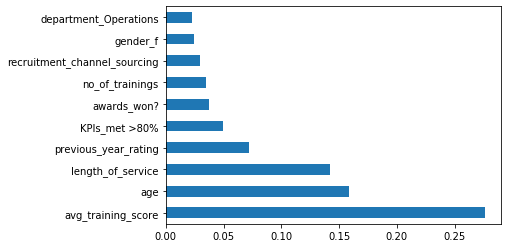

In [34]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

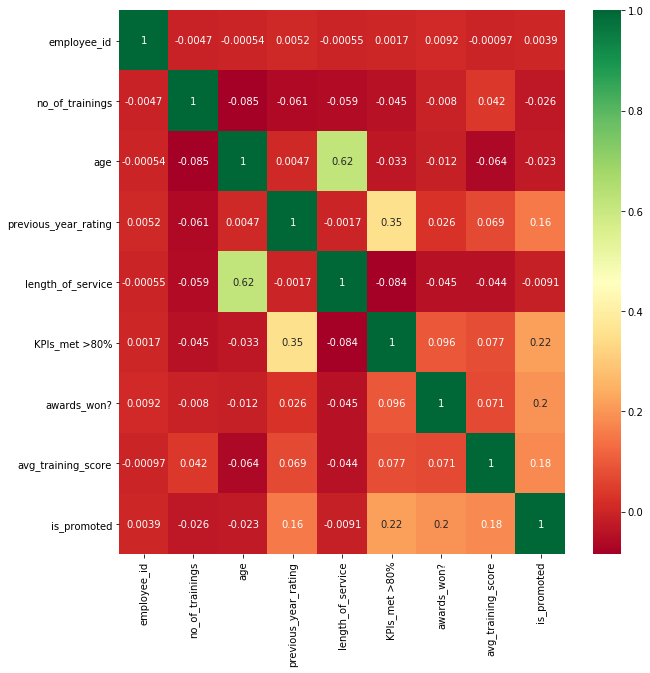

In [35]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#### As i dont not see that any two variables are highly corealted, so there is no need to drop any of the variables.
#### we can now go ahead with model building 

In [36]:
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [37]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [38]:
%matplotlib inline
np.random.seed(27)
rcParams['figure.figsize'] = 10, 6
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

In [39]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

In [40]:
X.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Operations,department_Procurement,department_Technology,...,region_region_2,region_region_22,region_region_7,region_region_15,region_region_13,region_region_26,region_region_31,region_region_4,region_region_27,region_region_16
0,1,42,4.0,11,0,0,58,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,37,5.0,8,0,0,50,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,36,5.0,2,1,0,82,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,2,27,3.0,4,0,0,50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,22,3.0,2,0,0,80,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [41]:
Y.head()

,is_promoted
0,0
1,0
2,1
3,0
4,0


#### performing train test split with 70 and 30% slplit for traing and test data respectevly

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

### As we saw earlier that our data is imbalanced, if we go ahead and use this our prediction will be over powered by the majority class
#### So we need to balance our data
#### For this we will use a technique known as SMOTE

but we do not know what is the best sampling ratio to increase our minority class so that our model gives us the best prediction 

so for this we will be performing grid search cv and randomized search cv

### Trying out Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
pipe = make_pipeline(
    SMOTE(),
    RandomForestClassifier()
    
)

weights = np.linspace(0.005, 0.25, 10)

gsc = GridSearchCV(
    estimator=pipe,
    param_grid={
        'smote__sampling_strategy': weights,
        
    },
    scoring='f1',
    cv=3
)
grid_result = gsc.fit(X_train, Y_train)

print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'smote__sampling_strategy': 0.19555555555555554}


#### so  no we can use 0.195 as the sampleing ratio as random forest weill perform best at this 

In [45]:
sm = SMOTE(random_state=0, sampling_strategy = 0.195)
x_train_res, y_train_res = sm.fit_sample(X_train, Y_train)

In [46]:
unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count

{0: 24915, 1: 4858}

In [47]:
forest = RandomForestClassifier().fit(x_train_res, y_train_res)
Y_Test_Pred = forest.predict(X_test)

In [48]:
pd.crosstab(Y_Test_Pred, Y_test[target], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,10491,786
1,127,272


In [49]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9218054128126071
Precision =  0.681704260651629
Recall =  0.2570888468809074
F1 Score =  0.37336993822923814


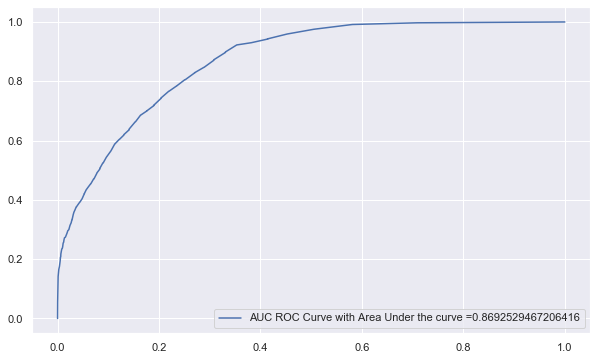

In [50]:
generate_auc_roc_curve(forest, X_test)

Using Hyperparameter optimization for Random Forest 

trying with Randomized Search CV

In [51]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [52]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 10 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train_res, y_train_res)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:   33.7s remaining:   29.5s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.2min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [53]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': False}

In [54]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=80, min_samples_split=10,
                       n_estimators=1000)

In [55]:
ran_forest = RandomForestClassifier(bootstrap=False, max_depth=80, min_samples_split=10,
                       n_estimators=1000).fit(x_train_res, y_train_res)
Y_Test_Pred_ran = forest.predict(X_test)

In [56]:
pd.crosstab(Y_Test_Pred_ran, Y_test[target], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,10491,786
1,127,272


In [57]:
generate_model_report(Y_test, Y_Test_Pred_ran)

Accuracy =  0.9218054128126071
Precision =  0.681704260651629
Recall =  0.2570888468809074
F1 Score =  0.37336993822923814


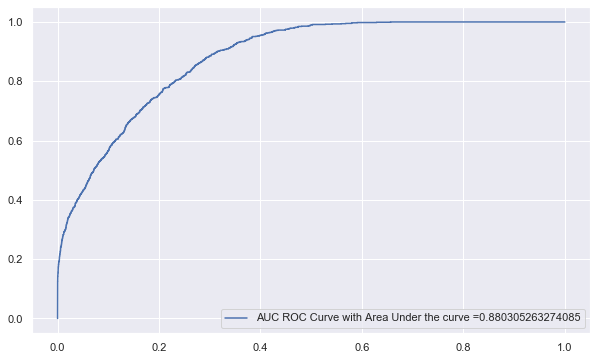

In [58]:
generate_auc_roc_curve(ran_forest, X_test)

### Xgboost

In [59]:
## hyper parameter optimization 

params ={
    'learning_rate' :[0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth' :[3, 4, 5, 6, 8, 10, 12, 15],
    'min_child_weight': [1,3,5,7],
    'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree' : [0.3, 0.4, 0.5, 0.7]
}

In [60]:
## Hyperparameter optimization using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [61]:
classifier = xgboost.XGBClassifier()

In [62]:
pipe = make_pipeline(
    SMOTE(),
    xgboost.XGBClassifier()
)

weights = np.linspace(0.005, 0.25, 10)

gsc = GridSearchCV(
    estimator=pipe,
    param_grid={
        'smote__sampling_strategy': weights,
        
    },
    scoring='f1',
    cv=3
)
grid_result = gsc.fit(X_train, Y_train)

print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'smote__sampling_strategy': 0.19555555555555554}


In [63]:
sm = SMOTE(random_state=0, sampling_strategy = 0.195)
x_train_res, y_train_res = sm.fit_sample(X_train, Y_train)

In [64]:
unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count

{0: 24915, 1: 4858}

In [65]:
random_search = RandomizedSearchCV(classifier,param_distributions=params,n_iter=10,scoring='f1',n_jobs=-1, cv=5, verbose=3)

In [66]:
random_search.fit(x_train_res, y_train_res)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   30.7s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [67]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=15,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [68]:
classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=15,
              min_child_weight=5, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None).fit(x_train_res, y_train_res)
Y_Test_Pred = classifier.predict(X_test)

In [69]:
pd.crosstab(Y_Test_Pred, Y_test[target], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,10407,621
1,211,437


In [70]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9287427201096266
Precision =  0.6743827160493827
Recall =  0.41304347826086957
F1 Score =  0.5123094958968347


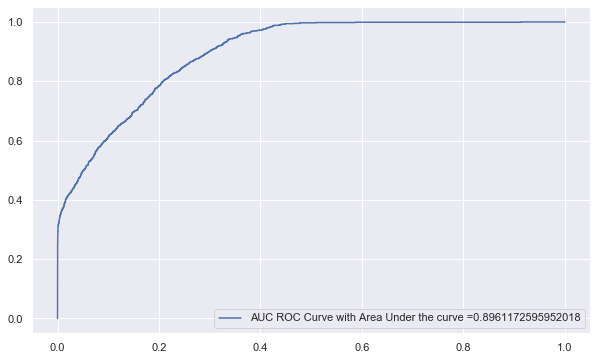

In [71]:
generate_auc_roc_curve(classifier, X_test)

### decesion tree Classifier

In [72]:
from sklearn import tree 

In [73]:
dtree = tree.DecisionTreeClassifier()

In [74]:
pipe = make_pipeline(
    SMOTE(),
    tree.DecisionTreeClassifier()
)

weights = np.linspace(0.005, 0.25, 10)

gsc = GridSearchCV(
    estimator=pipe,
    param_grid={
        'smote__sampling_strategy': weights,
        
    },
    scoring='f1',
    cv=3
)
grid_result = gsc.fit(X_train, Y_train)

print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'smote__sampling_strategy': 0.1411111111111111}


In [75]:
sm = SMOTE(random_state=0, sampling_strategy = 0.141)
x_train_res, y_train_res = sm.fit_sample(X_train, Y_train)

In [76]:
unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count

{0: 24915, 1: 3513}

In [77]:
dtree = tree.DecisionTreeClassifier().fit(x_train_res, y_train_res)
Y_Test_Pred = dtree.predict(X_test)

In [78]:
pd.crosstab(Y_Test_Pred, Y_test[target], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,9878,548
1,740,510


In [79]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.8896882494004796
Precision =  0.408
Recall =  0.4820415879017013
F1 Score =  0.44194107452339687


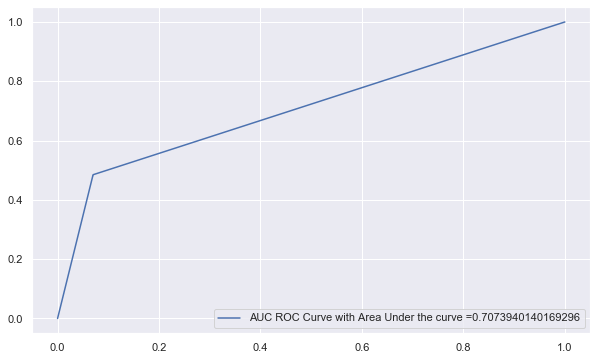

In [80]:
generate_auc_roc_curve(dtree, X_test)

### GradientBoostingClassifier

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

In [82]:
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [83]:
pipe = make_pipeline(
    SMOTE(),
    GradientBoostingClassifier()
)

weights = np.linspace(0.005, 0.25, 10)

gsc = GridSearchCV(
    estimator=pipe,
    param_grid={
        'smote__sampling_strategy': weights,
        
    },
    scoring='f1',
    cv=3
)
grid_result = gsc.fit(X_train, Y_train)

print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'smote__sampling_strategy': 0.16833333333333333}


In [84]:
sm = SMOTE(random_state=0, sampling_strategy = 0.1683)
x_train_res, y_train_res = sm.fit_sample(X_train, Y_train)

In [85]:
unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count

{0: 24915, 1: 4193}

In [86]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(gbc,parameters,cv=5)

In [87]:
cv.fit(x_train_res, y_train_res)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]})

In [88]:
cv.best_estimator_

GradientBoostingClassifier(max_depth=5, n_estimators=250)

In [89]:
gboost = GradientBoostingClassifier(max_depth=5, n_estimators=250).fit(x_train_res, y_train_res)
Y_Test_Pred = gboost.predict(X_test)

In [90]:
pd.crosstab(Y_Test_Pred, Y_test[target], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,10561,657
1,57,401


In [91]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9388489208633094
Precision =  0.8755458515283843
Recall =  0.3790170132325142
F1 Score =  0.5290237467018469


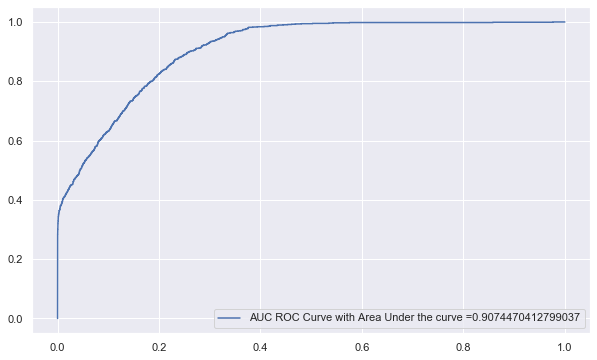

In [92]:
generate_auc_roc_curve(gboost, X_test)

### AdaBoostClassifier

In [93]:
from sklearn.ensemble import AdaBoostClassifier

In [94]:
ada=AdaBoostClassifier()
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='f1',n_jobs=1,cv=3)

In [95]:
pipe = make_pipeline(
    SMOTE(),
    AdaBoostClassifier()
)

weights = np.linspace(0.005, 0.25, 10)

gsc = GridSearchCV(
    estimator=pipe,
    param_grid={
        'smote__sampling_strategy': weights,
        
    },
    scoring='f1',
    cv=3
)
grid_result = gsc.fit(X_train, Y_train)

print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'smote__sampling_strategy': 0.22277777777777777}


In [96]:
sm = SMOTE(random_state=0, sampling_strategy = 0.22)
x_train_res, y_train_res = sm.fit_sample(X_train, Y_train)

In [97]:
unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count

{0: 24915, 1: 5481}

In [98]:
search.fit(x_train_res, y_train_res)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [500, 1000, 2000]},
             scoring='f1')

In [99]:
search.best_params_

{'learning_rate': 0.1, 'n_estimators': 2000}

In [100]:
search.best_estimator_

AdaBoostClassifier(learning_rate=0.1, n_estimators=2000)

In [101]:
adaboost = AdaBoostClassifier(learning_rate=0.1, n_estimators=2000).fit(x_train_res, y_train_res)
Y_Test_Pred = adaboost.predict(X_test)

In [102]:
pd.crosstab(Y_Test_Pred, Y_test[target], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,10506,842
1,112,216


In [103]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9182939362795478
Precision =  0.6585365853658537
Recall =  0.20415879017013233
F1 Score =  0.3116883116883117


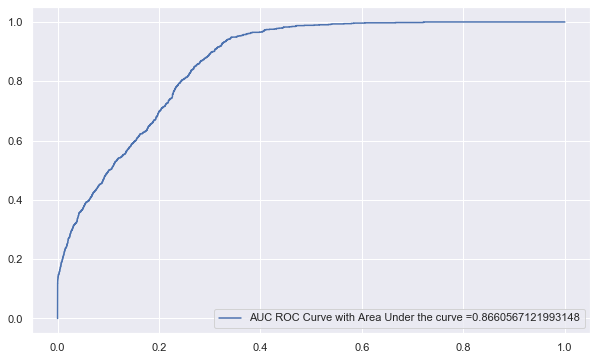

In [104]:
generate_auc_roc_curve(adaboost, X_test)

### As from the above classifier we ran we can see that Gradient Boosting is giving us the best results 

#### predicting the probability of the employee getting promoted

In [114]:
new_data = pd.read_csv('HR.csv')
new_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,2092,Operations,region_7,Bachelor's,m,other,1,42,4.0,11,0,0,58,0
1,12576,Sales & Marketing,region_22,Bachelor's,f,sourcing,1,37,5.0,8,0,0,50,0
2,74716,Technology,region_31,Bachelor's,m,other,1,36,5.0,2,1,0,82,1
3,6383,Sales & Marketing,region_30,Bachelor's,m,sourcing,2,27,3.0,4,0,0,50,0
4,34886,Technology,region_2,Below Secondary,f,referred,1,22,3.0,2,0,0,80,0


In [113]:
pipe = make_pipeline(
    SMOTE(),
    GradientBoostingClassifier()
)

weights = np.linspace(0.005, 0.25, 10)

gsc = GridSearchCV(
    estimator=pipe,
    param_grid={
        'smote__sampling_strategy': weights,
        
    },
    scoring='f1',
    cv=3
)
grid_result = gsc.fit(X_train, Y_train)

print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'smote__sampling_strategy': 0.1411111111111111}


In [115]:
sm = SMOTE(random_state=0, sampling_strategy = 0.141)
x_train_res, y_train_res = sm.fit_sample(X_train, Y_train)

In [116]:
unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count

{0: 24915, 1: 3513}

In [119]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier=GradientBoostingClassifier(max_depth=5, n_estimators=250)
gb_classifier.fit(x_train_res, y_train_res)
ytrain_pred = gb_classifier.predict_proba(x_train_res)
print('gboost train roc-auc: {}'.format(roc_auc_score(y_train_res, ytrain_pred[:,1])))
ytest_pred = gb_classifier.predict_proba(X_test)
print('gboost test roc-auc: {}'.format(roc_auc_score(Y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9644583728142807
Adaboost test roc-auc: 0.9104183305376147


In [120]:
ytrain_pred

array([[0.99839341, 0.00160659],
       [0.99852918, 0.00147082],
       [0.93044368, 0.06955632],
       ...,
       [0.00184533, 0.99815467],
       [0.12003914, 0.87996086],
       [0.00475407, 0.99524593]])

In [121]:
pred=[]
for model in [gb_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1)
print(' test roc-auc: {}'.format(roc_auc_score(Y_test,final_prediction)))

 test roc-auc: 0.9104183305376147


In [122]:
pd.concat(pred,axis=1)

,0
0,0.002635
1,0.209686
2,0.000878
3,0.058644
4,0.009858
...,...
11671,0.005881
11672,0.001303
11673,0.064332
11674,0.000527


In [128]:
final_prediction

,0
0,0.002635
1,0.209686
2,0.000878
3,0.058644
4,0.009858
...,...
11671,0.005881
11672,0.001303
11673,0.064332
11674,0.000527


## working on the whole data to get the prediction 

In [130]:
encoded_df.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Operations,...,region_region_2,region_region_22,region_region_7,region_region_15,region_region_13,region_region_26,region_region_31,region_region_4,region_region_27,region_region_16
0,2092,1,42,4.0,11,0,0,58,0,1,...,0,0,1,0,0,0,0,0,0,0
1,12576,1,37,5.0,8,0,0,50,0,0,...,0,1,0,0,0,0,0,0,0,0
2,74716,1,36,5.0,2,1,0,82,1,0,...,0,0,0,0,0,0,1,0,0,0
3,6383,2,27,3.0,4,0,0,50,0,0,...,0,0,0,0,0,0,0,0,0,0
4,34886,1,22,3.0,2,0,0,80,0,0,...,1,0,0,0,0,0,0,0,0,0


In [131]:
encoded_df = encoded_df.set_index('employee_id')

In [132]:
encoded_df.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Operations,department_Procurement,...,region_region_2,region_region_22,region_region_7,region_region_15,region_region_13,region_region_26,region_region_31,region_region_4,region_region_27,region_region_16
employee_id,,,,,,,,,,,,,,,,,,,,,
2092,1,42,4.0,11,0,0,58,0,1,0,...,0,0,1,0,0,0,0,0,0,0
12576,1,37,5.0,8,0,0,50,0,0,0,...,0,1,0,0,0,0,0,0,0,0
74716,1,36,5.0,2,1,0,82,1,0,0,...,0,0,0,0,0,0,1,0,0,0
6383,2,27,3.0,4,0,0,50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34886,1,22,3.0,2,0,0,80,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [133]:
X = encoded_df.drop(['is_promoted'], axis='columns')
X.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Operations,department_Procurement,department_Technology,...,region_region_2,region_region_22,region_region_7,region_region_15,region_region_13,region_region_26,region_region_31,region_region_4,region_region_27,region_region_16
employee_id,,,,,,,,,,,,,,,,,,,,,
2092,1,42,4.0,11,0,0,58,1,0,0,...,0,0,1,0,0,0,0,0,0,0
12576,1,37,5.0,8,0,0,50,0,0,0,...,0,1,0,0,0,0,0,0,0,0
74716,1,36,5.0,2,1,0,82,0,0,1,...,0,0,0,0,0,0,1,0,0,0
6383,2,27,3.0,4,0,0,50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34886,1,22,3.0,2,0,0,80,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [134]:
target = 'is_promoted'
Y = encoded_df.loc[:, encoded_df.columns== target]
Y.head()

,is_promoted
employee_id,
2092,0
12576,0
74716,1
6383,0
34886,0


In [135]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier=GradientBoostingClassifier(max_depth=5, n_estimators=250)
gb_classifier.fit(x_train_res, y_train_res)
ytrain_pred = gb_classifier.predict_proba(x_train_res)
print('gboost train roc-auc: {}'.format(roc_auc_score(y_train_res, ytrain_pred[:,1])))
ytest_pred = gb_classifier.predict_proba(X)
print('gboost test roc-auc: {}'.format(roc_auc_score(Y, ytest_pred[:,1])))

Adaboost train roc-auc: 0.963168973199456
Adaboost test roc-auc: 0.9380522801094338


In [136]:
ytrain_pred

array([[0.99845978, 0.00154022],
       [0.99883106, 0.00116894],
       [0.94563117, 0.05436883],
       ...,
       [0.00180826, 0.99819174],
       [0.13788651, 0.86211349],
       [0.00507256, 0.99492744]])

In [137]:
pred=[]
for model in [gb_classifier]:
    pred.append(pd.Series(model.predict_proba(X)[:,1]))
final_prediction=pd.concat(pred,axis=1)
print(' test roc-auc: {}'.format(roc_auc_score(Y,final_prediction)))

 test roc-auc: 0.9380522801094338


In [139]:
prediction = pd.concat(pred,axis=1)

In [140]:
probability = pd.concat([df['employee_id'], prediction], axis =1)

In [144]:
probability = probability.set_index('employee_id')

In [148]:
probability

,0
employee_id,
2092,0.001449
12576,0.002224
74716,0.312427
6383,0.002160
34886,0.005628
...,...
44397,0.219320
46508,0.043282
25811,0.011838
